In [1]:
import qiskit
print(qiskit.version.get_version_info())

2.0.2


In [2]:
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
import qiskit_aer

# import basic plot tools
from qiskit.visualization import plot_histogram
from math import pi, sqrt, exp

In [ ]:
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(1, 'c')
qftcircuit = QuantumCircuit(qr, cr)
qftcircuit_init = QuantumCircuit(qr, cr)

In [4]:
qftcircuit.h(qr[0])  # Hadamard gate on the first qubit
qftcircuit.cp(pi/2, qr[0], qr[1])
qftcircuit.cp(pi/4, qr[0], qr[2])
# Apply Hadamard gate to the second qubit
qftcircuit.h(qr[1])
qftcircuit.cp(pi/2, qr[1], qr[2])   
# Apply Hadamard gate to the third qubit
qftcircuit.h(qr[2])
# Apply a swap gate to the first and third qubits
qftcircuit.swap(qr[0], qr[2])
# Measure the first qubit
qftcircuit.measure(qr[0], cr[0])

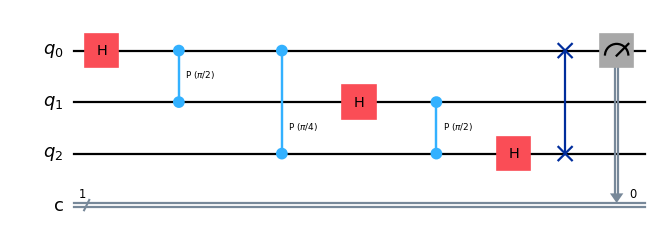

In [5]:
%matplotlib inline
from qiskit.visualization import circuit_drawer
qftcircuit.draw(output='mpl', scale=0.8, style={'name': 'iqp'}).savefig('qft_circuit.png')

In [6]:
backend = qiskit_aer.Aer.get_backend('qasm_simulator')
sim = qiskit_aer.Aer.get_backend("aer_simulator")

In [7]:
circuits = [qftcircuit]
new_circuits = transpile(circuits, backend)
job = backend.run(new_circuits)
result = job.result()

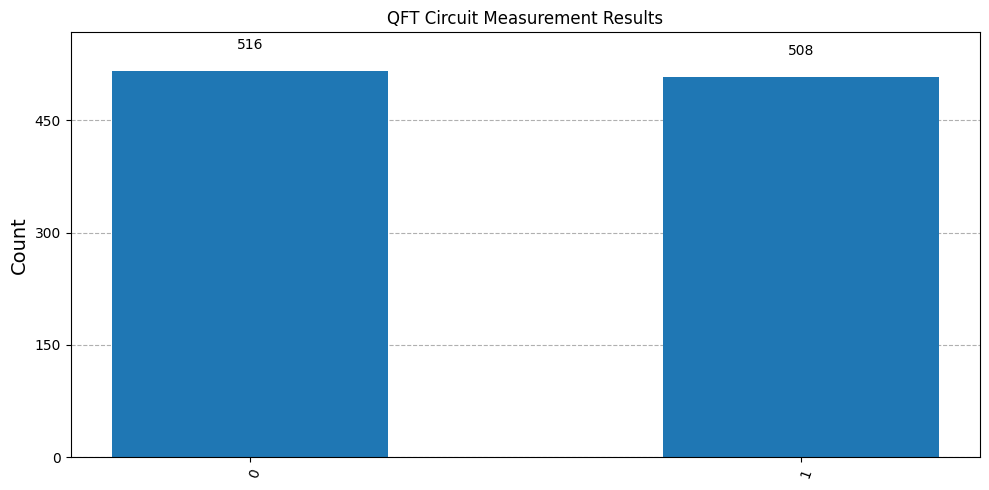

In [8]:
plot_histogram(result.get_counts(qftcircuit), figsize=(10, 5), title='QFT Circuit Measurement Results').savefig('qft_histogram.png')

In [9]:
from qiskit.visualization import plot_bloch_multivector

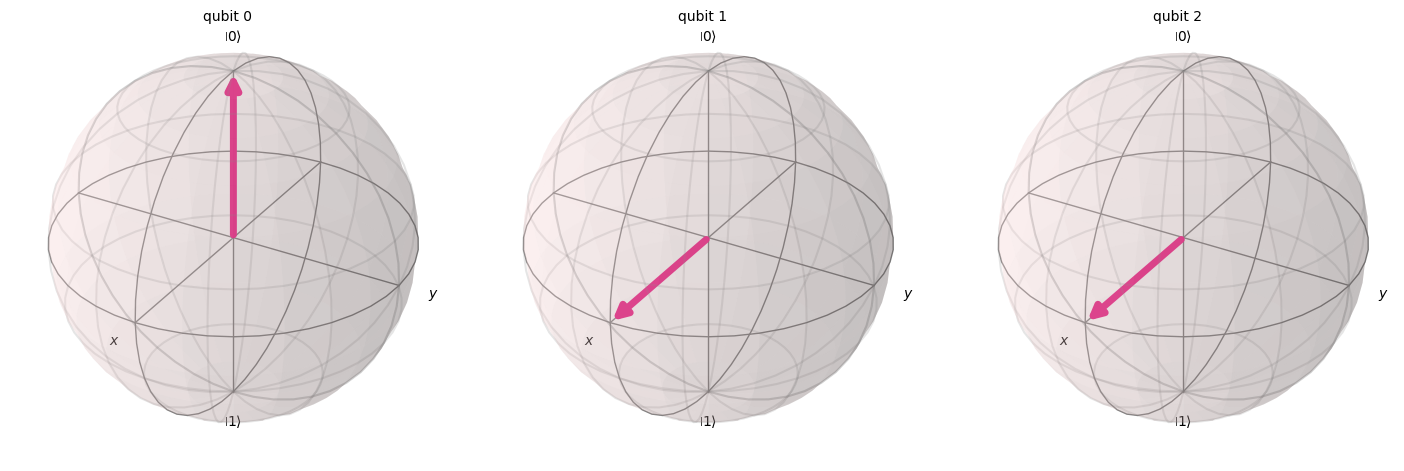

<IPython.core.display.Latex object>

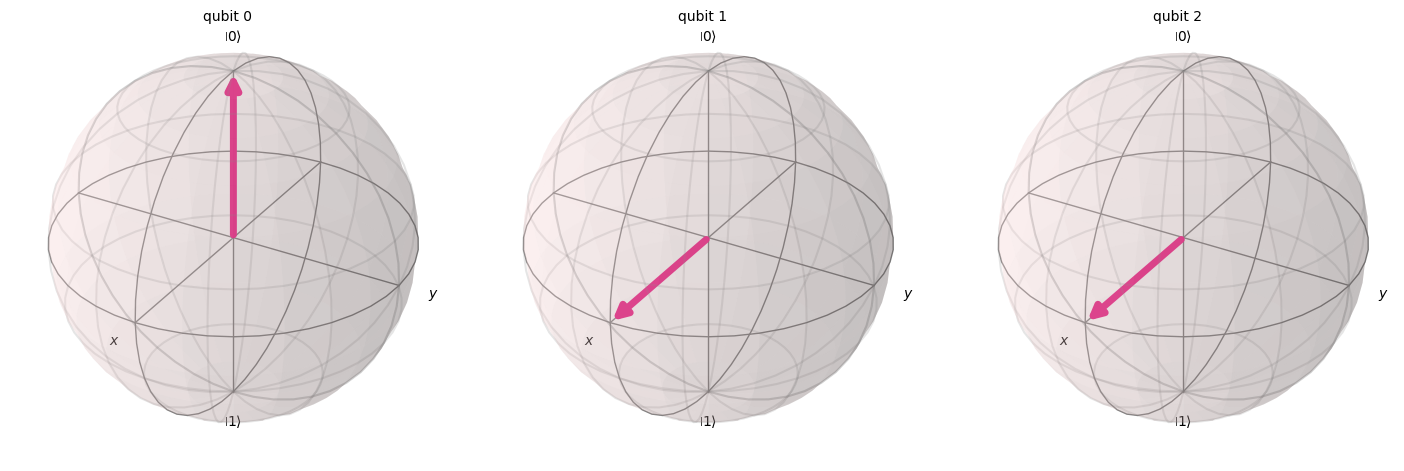

In [10]:
# To visualize the state vector, we need to use the Aer simulator
qftcircuit.save_statevector()
statevector = sim.run(qftcircuit).result().get_statevector()
display(plot_bloch_multivector(statevector))
display(statevector.draw('latex'))